# FINAL PROJECT

## The Kronig-Penney model extended to arbitrary potentials via numerical matrix mechanics 

### Group no.5:   Nitish goyal 18510053 Rachana choudhary 18510063

In [3]:
import numpy as np
import scipy
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
from scipy import signal
import mpld3
pi=np.pi


## Compare the energy eigenvalues for two different  basis

###  1.  Harmonic oscillator (infinite square well basis)

In [4]:
def G(i,j):
    return ((-1)**(i+j)+1)/4*(1/(j-i)**2-1/(j+i)**2)

In [5]:
gama=20

In [6]:
def HO_sqrwl(gama):
    h=[]
    for n in range(1,61):
        H1=[]
        for m in range(1,61):
            if n==m:
                H1.append(( n**2 + ((pi * gama) ** 2 / 48)  * (1-6/(pi*n)**2) ))
            else:
                H1.append(gama**2*G(m,n))
        h.append(H1)
    h=np.array(h)
    return h

###    2. Harmonic oscillator infinite square well potential (with perodic boundary condition type basis)

In [7]:
def HO_periodic(gama):
    H=[]
    for n in range(-30,30):
        H1=[]
        for m in range(-30,30):
            if n==m:
                H1.append((4*n**2+(pi*gama)**2/48))
            else:
                H1.append((gama**2/8)*(1/(m-n)**2))
        H.append(H1)
    H=np.array(H)
    return H       

In [8]:
eva_sqrwl=eigsh(HO_sqrwl(gama),61)[0]
eva_periodic=eigsh(HO_periodic(gama),61)[0]

/usr/lib/python3/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


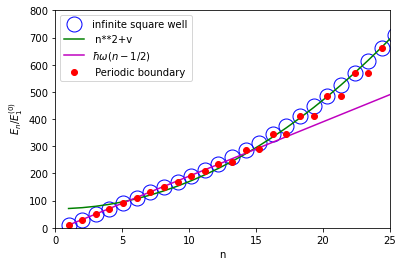

In [9]:
n=np.linspace(1,61,60)

plt.plot(n,eva_sqrwl,'bo',mfc='none',markersize=15,label='infinite square well')
plt.plot(n,n**2+70,'g',label=' n**2+v')
plt.plot(n,20*(n-.5),'m',label='$ \hbar \omega (n - 1/2)$ ')
plt.plot(n,eva_periodic,'ro',markersize=6,label=' Periodic boundary')

plt.xlabel('n')
plt.ylabel(' $ E_n/E_1^{(0)}$')
plt.xlim(0,25)
plt.ylim(0,800)
plt.legend()

plt.savefig('plot1',dpi=600)
plt.show()

###  Analaytical Fourier coefﬁcients for the inﬁnite square well and the periodic-boundary-condition

### 1. Fourier coefﬁcients for the inﬁnite square well

In [10]:
Cn=[]
for n in range(1,61):
    if n % 2 !=0:
        Cn.append( (1j)**(n-1)*(32/(pi*gama))**(1/4)*np.exp(-n**2/gama))
    else:
        Cn.append(0)
Cn=np.array(Cn)


### 2. Fourier coefﬁcients for the periodic-boundary-condition

In [11]:
Cnn=[]
for n in range(0,30):
    Cnn.append((-1)**n*((8/(pi*gama))**(1/4))*np.exp(-4*n**2/gama))
    Cnn.append((-1)**(-n)*((8/(pi*gama))**(1/4))*np.exp(-4*n**2/gama))
Cnn=np.array(Cnn[1::])


### Plot

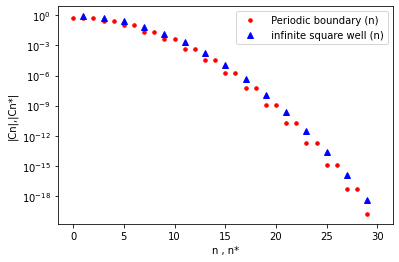

In [12]:
plt.semilogy([i for i in range(30)],abs(Cnn[:30]),'.r',markersize=7,label=' Periodic boundary (n)')
plt.semilogy([i for i in range(1,31)],abs(Cn[:30]),'^b',label=' infinite square well (n)')
plt.xlabel('n , n*')
plt.ylabel('|Cn|,|Cn*|')

plt.legend()
plt.show()

###  Numerical comparison of periodic and square well basis sets


In [13]:
x=np.linspace(0,1,1000)
gama=20
a=1
psi=(pi*gama/2/a**2)**(1/4)*np.exp(-pi**2*gama/4/a**2*(x-.5)**2)
Cn=[]
for i in range(1,60):
    psi1=np.sqrt(2)*np.sin(i*pi*x)
    Cn.append(np.dot(psi1,psi))
Cn=abs(np.array(Cn))/1000

Cnn=[]
for i in range(0,30):
    psi1=np.exp(1j*pi*x*2*i)
    psi2=np.exp(1j*pi*x*2*-i)
    Cnn.append(np.dot(psi1,psi))
    Cnn.append(np.dot(psi2,psi))
Cnn=abs(np.array(Cnn)/1000)[1::]


### Plot

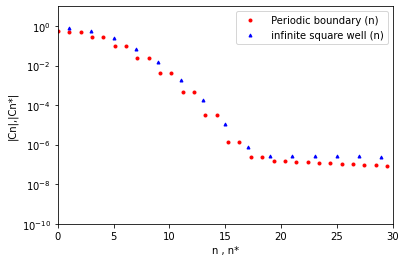

In [14]:
plt.semilogy(np.linspace(0,59,59),Cnn,'r.',label=' Periodic boundary (n)')
plt.semilogy(np.linspace(1,59,59),Cn,'b^',markersize=3,label=' infinite square well (n)')
plt.xlim(0,30)
plt.ylim(10**-10,10**1)
plt.xlabel('n , n*')
plt.ylabel('|Cn|,|Cn*|')

plt.legend()
plt.show()

### General shape of Kronig-penney potential

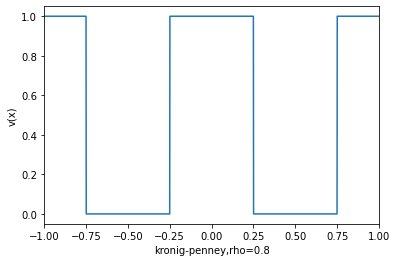

In [15]:
a,b=.5,.5
t = np.linspace(-10, 10, 5000)
plt.plot(t*(a+b)/(2*pi)-b/2, (signal.square(t,duty=b/(a+b))+1)/2)
plt.xlim(-1,1)
plt.xlabel('kronig-penney,rho=0.8')
plt.ylabel('v(x)')
plt.show()

### Energy band diagram for kronig penny potential for no barrier height (Vo=0)

In [16]:
def KronigPenney_band(rho,v0):
    a=rho
    b=1-rho
    K=np.linspace(-pi/a,pi/a,1601)
    b1,b2,b3,b4,b5=[],[],[],[],[]
    
    for k in K:  
        h1=[]
        for n in range(-30,30):
            H1=[]
            for m in range(-30,30):
                if n==m:
                    H1.append(( 2*n+k*a/pi)**2 + v0*(1-rho))
                else:
                    H1.append(v0*(-1)**(m-n+1)/pi*np.sin(pi*(m-n)*rho)/(m-n))
            h1.append(H1)
        h1=np.array(h1)
        evaa=eigsh(h1,60)[0]
        b1.append(evaa[0])
        b2.append(evaa[1])
        b3.append(evaa[2])
        b4.append(evaa[3])
        b5.append(evaa[4])
    return b1,b2,b3,b4,b5,K*a/pi

/usr/lib/python3/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


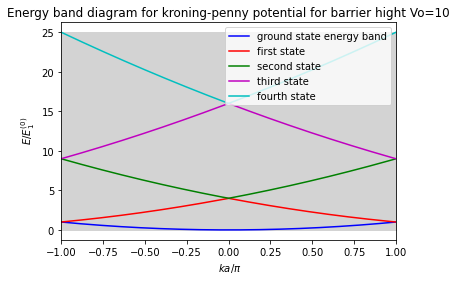

In [17]:
b1,b2,b3,b4,b5,K = KronigPenney_band(.5,0)

plt.plot(K,b1,'b',markersize=.5,label='ground state energy band')
plt.plot(K,b2,'r',markersize=.5,label='first state')
plt.plot(K,b3,'g',markersize=.5,label='second state')
plt.plot(K,b4,'m',markersize=.5,label='third state')
plt.plot(K,b5,'c',markersize=.5,label='fourth state')

    
plt.fill_between([-1,1],[b1[0],b1[-1]],[b1[801],b1[801]],color='lightgrey')
plt.fill_between([-1,1],[b2[0],b2[-1]],[b2[801],b2[801]],color='lightgrey')
plt.fill_between([-1,1],[b3[0],b3[-1]],[b3[801],b3[801]],color='lightgrey')
plt.fill_between([-1,1],[b4[0],b4[-1]],[b4[801],b4[801]],color='lightgrey')
plt.fill_between([-1,1],[b5[0],b5[-1]],[b5[801],b5[801]],color='lightgrey')
plt.xlabel(' $ ka/\pi$' )
plt.ylabel(' $ E/E_1^{(0)}$')
plt.xlim(-1,1)
plt.title('Energy band diagram for kroning-penny potential for barrier hight Vo=10')
plt.legend()
plt.show()

### Energy band diagram for kroning-penny potential for barrier height Vo=10

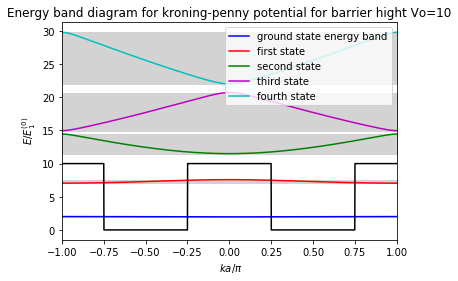

In [308]:
b1,b2,b3,b4,b5,K = KronigPenney_band(.5,10)

plt.plot(K,b1,'b',markersize=.5,label='ground state energy band')
plt.plot(K,b2,'r',markersize=.5,label='first state')
plt.plot(K,b3,'g',markersize=.5,label='second state')
plt.plot(K,b4,'m',markersize=.5,label='third state')
plt.plot(K,b5,'c',markersize=.5,label='fourth state')
a,b=.5,.5
plt.plot(t*(a+b)/(2*pi)-b/2, 10*(signal.square(t,duty=b/(a+b))+1)/2,'k')
    
plt.fill_between([-1,1],[b1[0],b1[-1]],[b1[801],b1[801]],color='lightgrey')
plt.fill_between([-1,1],[b2[0],b2[-1]],[b2[801],b2[801]],color='lightgrey')
plt.fill_between([-1,1],[b3[0],b3[-1]],[b3[801],b3[801]],color='lightgrey')
plt.fill_between([-1,1],[b4[0],b4[-1]],[b4[801],b4[801]],color='lightgrey')
plt.fill_between([-1,1],[b5[0],b5[-1]],[b5[801],b5[801]],color='lightgrey')
plt.xlabel(' $ ka/\pi$' )
plt.ylabel(' $ E/E_1^{(0)}$')
plt.xlim(-1,1)
plt.title('Energy band diagram for kroning-penny potential for barrier hight Vo=10')
plt.legend()
plt.show()

### Comparing Band structures for different potentials

### Representations of the potentials used for comparing energy band structure

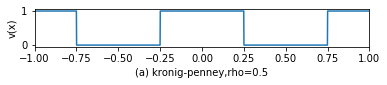

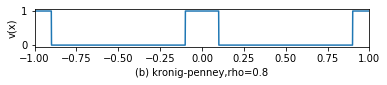

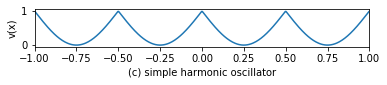

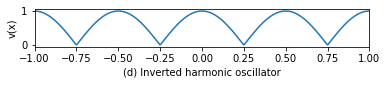

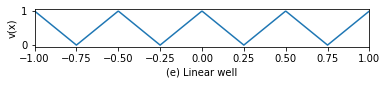

In [349]:
t = np.linspace(-10, 10, 5000)

plt.figure()
plt.subplot(511)
a,b=.5,.5
plt.plot(t*(a+b)/(2*pi)-b/2, (signal.square(t,duty=b/(a+b))+1)/2)
plt.xlim(-1,1)
plt.xlabel('(a) kronig-penney,rho=0.5')
plt.ylabel('v(x)')

plt.figure()
plt.subplot(512)
a,b=.8,.2
plt.plot(t*(a+b)/(2*pi)-b/2, (signal.square(t,duty=b/(a+b))+1)/2)
plt.xlim(-1,1)
plt.xlabel('(b) kronig-penney,rho=0.8')
plt.ylabel('v(x)')

plt.figure()
plt.subplot(513)
plt.plot(t,1-abs(np.sin(t*2*pi)))
plt.xlim(-1,1)
plt.xlabel('(c) simple harmonic oscillator')
plt.ylabel('v(x)')

plt.figure()
plt.subplot(514)
plt.plot(t-.25,abs(np.sin(t*2*pi)))
plt.xlim(-1,1)
plt.xlabel('(d) Inverted harmonic oscillator')
plt.ylabel('v(x)')

plt.figure()
plt.subplot(515)
tri=np.abs(signal.sawtooth( np.pi * 4 * t)) 
plt.plot(t,tri)
plt.xlim(-1,1)
plt.xlabel('(e) Linear well')
plt.ylabel('v(x)')


plt.show()

#### 1. Energy band diagram for the kronig penney potential with rho=0.5 and V0 = 20.5607

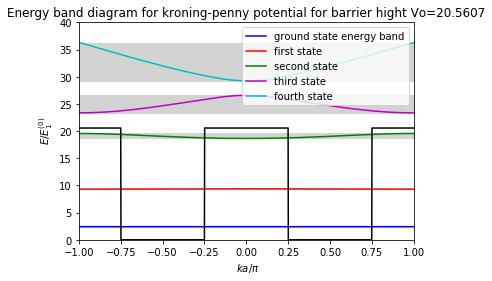

In [302]:
b1,b2,b3,b4,b5,K = KronigPenney_band(.5,20.5607)
b13,K1=b3,K

plt.plot(K,b1,'b',markersize=.5,label='ground state energy band')
plt.plot(K,b2,'r',markersize=.5,label='first state')
plt.plot(K,b3,'g',markersize=.5,label='second state')
plt.plot(K,b4,'m',markersize=.5,label='third state')
plt.plot(K,b5,'c',markersize=.5,label='fourth state')
a,b,v0=.5,.5,20.5607
plt.plot(t*(a+b)/(2*pi)-b/2, v0*(signal.square(t,duty=b/(a+b))+1)/2,'k')

plt.fill_between([-1,1],[b1[0],b1[-1]],[b1[801],b1[801]],color='lightgrey')
plt.fill_between([-1,1],[b2[0],b2[-1]],[b2[801],b2[801]],color='lightgrey')
plt.fill_between([-1,1],[b3[0],b3[-1]],[b3[801],b3[801]],color='lightgrey')
plt.fill_between([-1,1],[b4[0],b4[-1]],[b4[801],b4[801]],color='lightgrey')
plt.fill_between([-1,1],[b5[0],b5[-1]],[b5[801],b5[801]],color='lightgrey')
plt.xlabel(' $ ka/\pi$' )
plt.ylabel(' $ E/E_1^{(0)}$')
plt.xlim(-1,1)
plt.ylim(0,40)
plt.title('Energy band diagram for kroning-penny potential for barrier hight Vo=20.5607')
plt.legend()
plt.show()

#### 2. Energy band diagram for the kronig penney potential with rho=0.8 and V0 = 10.8775

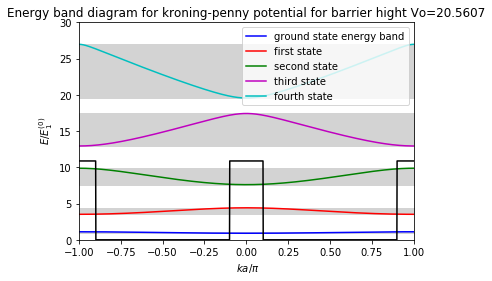

In [309]:
b1,b2,b3,b4,b5,K = KronigPenney_band(.8,10.8775)
b23,K2=b3,K

plt.plot(K,b1,'b',markersize=.5,label='ground state energy band')
plt.plot(K,b2,'r',markersize=.5,label='first state')
plt.plot(K,b3,'g',markersize=.5,label='second state')
plt.plot(K,b4,'m',markersize=.5,label='third state')
plt.plot(K,b5,'c',markersize=.5,label='fourth state')
a,b,v0=.8,.2,10.8775
plt.plot(t*(a+b)/(2*pi)-b/2, v0*(signal.square(t,duty=b/(a+b))+1)/2,'k')

plt.fill_between([-1,1],[b1[0],b1[-1]],[b1[801],b1[801]],color='lightgrey')
plt.fill_between([-1,1],[b2[0],b2[-1]],[b2[801],b2[801]],color='lightgrey')
plt.fill_between([-1,1],[b3[0],b3[-1]],[b3[801],b3[801]],color='lightgrey')
plt.fill_between([-1,1],[b4[0],b4[-1]],[b4[801],b4[801]],color='lightgrey')
plt.fill_between([-1,1],[b5[0],b5[-1]],[b5[801],b5[801]],color='lightgrey')
plt.xlabel(' $ ka/\pi$' )
plt.ylabel(' $ E/E_1^{(0)}$')
plt.xlim(-1,1)
plt.ylim(0,30)
plt.title('Energy band diagram for kroning-penny potential for barrier hight Vo=20.5607')
plt.legend()
plt.show()

#### 3. Energy band diagram for the simple harmonic oscillator potential for gamma = 4.84105

In [310]:
def HO_band(gama):
    a=1
    K=np.linspace(-pi/a,pi/a,1601)
    b1,b2,b3,b4,b5=[],[],[],[],[]
    for k in K:  
        h1=[]

        for n in range(-30,30):
            H1=[]
            for m in range(-30,30):

                if n==m:
                    H1.append(( 2*n+k*a/pi)**2 + (pi*gama)**2/48)
                else:
                    H1.append((gama/(m-n))**2/8)
            h1.append(H1)
        h1=np.array(h1)
        evaa=eigsh(h1,60)[0]
        b1.append(evaa[0])
        b2.append(evaa[1])
        b3.append(evaa[2])
        b4.append(evaa[3])
        b5.append(evaa[4])
    return b1,b2,b3,b4,b5,K*a/pi


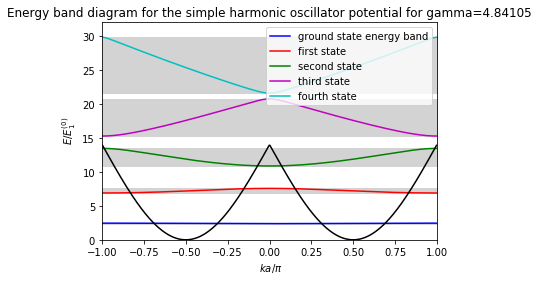

In [311]:
b1,b2,b3,b4,b5,K = HO_band(4.84105)
b33,K3=b3,K
plt.plot(K,b1,'b',markersize=.5,label='ground state energy band')
plt.plot(K,b2,'r',markersize=.5,label='first state')
plt.plot(K,b3,'g',markersize=.5,label='second state')
plt.plot(K,b4,'m',markersize=.5,label='third state')
plt.plot(K,b5,'c',markersize=.5,label='fourth state')
plt.plot(t,14*(1-abs(np.sin(t*pi))),'k')
plt.fill_between([-1,1],[b1[0],b1[-1]],[b1[801],b1[801]],color='lightgrey')
plt.fill_between([-1,1],[b2[0],b2[-1]],[b2[801],b2[801]],color='lightgrey')
plt.fill_between([-1,1],[b3[0],b3[-1]],[b3[801],b3[801]],color='lightgrey')
plt.fill_between([-1,1],[b4[0],b4[-1]],[b4[801],b4[801]],color='lightgrey')
plt.fill_between([-1,1],[b5[0],b5[-1]],[b5[801],b5[801]],color='lightgrey')
plt.xlabel(' $ ka/\pi$' )
plt.ylabel(' $ E/E_1^{(0)}$')
plt.xlim(-1,1)
plt.ylim(0,32)
plt.title('Energy band diagram for the simple harmonic oscillator potential for gamma=4.84105')
plt.legend()
plt.show()

#### 4. Energy band diagram for inverted harmonic oscillator potential for gamma = 7.30845

In [312]:
def revHO_band(gama):
    a=1
    K=np.linspace(-pi/a,pi/a,1601)
    b1,b2,b3,b4,b5=[],[],[],[],[]
    for k in K:  
        h1=[]
        gama=7.30845
        for n in range(-30,30):
            H1=[]
            for m in range(-30,30):

                if n==m:
                    H1.append(( 2*n+k*a/pi)**2 + (pi*gama)**2/24)
                else:
                    H1.append(-(gama/(m-n))**2/8*(-1)**(m-n))
            h1.append(H1)
        h1=np.array(h1)
        evaa=eigsh(h1,60)[0]
        b1.append(evaa[0])
        b2.append(evaa[1])
        b3.append(evaa[2])
        b4.append(evaa[3])
        b5.append(evaa[4])
        
    return b1,b2,b3,b4,b5,K*a/pi

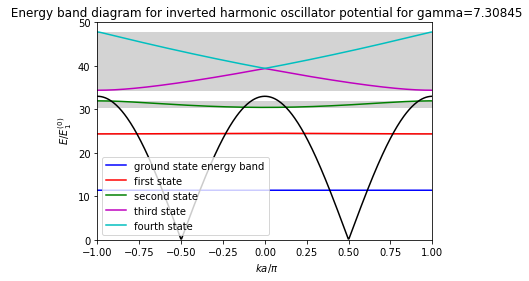

In [314]:
b1,b2,b3,b4,b5,K = revHO_band(7.30845)
b43,K4=b3,K


plt.plot(K,b1,'b',markersize=.5,label='ground state energy band')
plt.plot(K,b2,'r',markersize=.5,label='first state')
plt.plot(K,b3,'g',markersize=.5,label='second state')
plt.plot(K,b4,'m',markersize=.5,label='third state')
plt.plot(K,b5,'c',markersize=.5,label='fourth state')
plt.plot(t-.5,33*abs(np.sin(t*pi)),'k')
plt.fill_between([-1,1],[b1[0],b1[-1]],[b1[801],b1[801]],color='lightgrey')
plt.fill_between([-1,1],[b2[0],b2[-1]],[b2[801],b2[801]],color='lightgrey')
plt.fill_between([-1,1],[b3[0],b3[-1]],[b3[801],b3[801]],color='lightgrey')
plt.fill_between([-1,1],[b4[0],b4[-1]],[b4[801],b4[801]],color='lightgrey')
plt.fill_between([-1,1],[b5[0],b5[-1]],[b5[801],b5[801]],color='lightgrey')
plt.xlabel(' $ ka/\pi$' )
plt.ylabel(' $ E/E_1^{(0)}$')
plt.xlim(-1,1)
plt.ylim(0,50)
plt.title(' Energy band diagram for inverted harmonic oscillator potential for gamma=7.30845')

plt.legend()
plt.show()

#### 5. Energy band diagram for Linear well potential with  A=19.8705

In [315]:
def Linearwell(A):
    a=1
    K=np.linspace(-pi/a,pi/a,1601)
    b1,b2,b3,b4,b5=[],[],[],[],[]
    for k in K:  
        h1=[]
        for n in range(-30,30):
            H1=[]
            for m in range(-30,30):

                if n==m:
                    H1.append(( 2*n+k*a/pi)**2 + A/2)
                else:
                    H1.append(-A/(pi*(m-n))**2*(1-(-1)**(m-n)))
            h1.append(H1)
        h1=np.array(h1)
        evaa=eigsh(h1,60)[0]
        b1.append(evaa[0])
        b2.append(evaa[1])
        b3.append(evaa[2])
        b4.append(evaa[3])
        b5.append(evaa[4])
    return b1,b2,b3,b4,b5,K*a/pi 

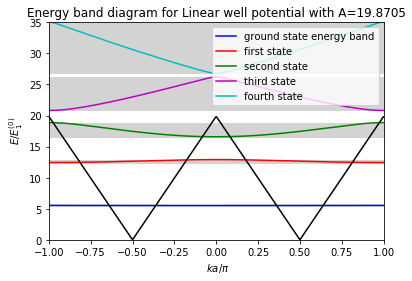

In [316]:
b1,b2,b3,b4,b5,K = Linearwell(19.8705)
b53,K5=b3,K

plt.plot(K,b1,'b',markersize=.5,label='ground state energy band')
plt.plot(K,b2,'r',markersize=.5,label='first state')
plt.plot(K,b3,'g',markersize=.5,label='second state')
plt.plot(K,b4,'m',markersize=.5,label='third state')
plt.plot(K,b5,'c',markersize=.5,label='fourth state')
tri=19.8705*np.abs(signal.sawtooth( np.pi * 2 * t))
plt.plot(t,tri,'k')
plt.fill_between([-1,1],[b1[0],b1[-1]],[b1[801],b1[801]],color='lightgrey')
plt.fill_between([-1,1],[b2[0],b2[-1]],[b2[801],b2[801]],color='lightgrey')
plt.fill_between([-1,1],[b3[0],b3[-1]],[b3[801],b3[801]],color='lightgrey')
plt.fill_between([-1,1],[b4[0],b4[-1]],[b4[801],b4[801]],color='lightgrey')
plt.fill_between([-1,1],[b5[0],b5[-1]],[b5[801],b5[801]],color='lightgrey')
plt.xlabel(' $ ka/\pi$' )
plt.ylabel(' $ E/E_1^{(0)}$')
plt.xlim(-1,1)
plt.ylim(0,35)
plt.title('Energy band diagram for Linear well potential with A=19.8705')

plt.legend()
plt.show()

### The third energy band for the five potentials (K-P(rho=0.5), K-P(rho=0.8), SHO, Inv.HO, Linear)

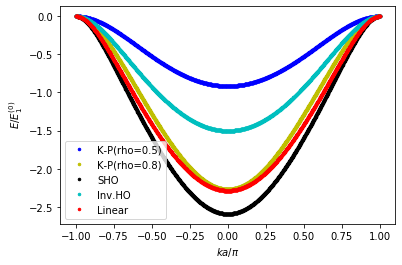

In [191]:
plt.plot(K1,b13-b13[0],'.b',markersize=5,label='K-P(rho=0.5)')
plt.plot(K2,b23-b23[0],'.y',markersize=5,label='K-P(rho=0.8)')
plt.plot(K3,b33-b33[0],'.k',markersize=5,label='SHO')
plt.plot(K4,b43-b43[0],'.c',markersize=5,label='Inv.HO')
plt.plot(K5,b53-b53[0],'.r',markersize=5,label='Linear')
plt.xlabel('$ ka/\pi$ ')
plt.ylabel(' $ E/E_1^{(0)}$')


plt.legend()

plt.show()

#### Mass Ratio $m^*_h/m^*_e$ for 3rd energy band

In [319]:
def massratio(b13,K1):
    mh=1/(np.gradient(np.gradient(b13,K1),K1)[0]*1)
    me=1/(np.gradient(np.gradient(b13,K1),K1)[800]*.5)
    return mh/me

In [322]:
print('Mass ratio for K-P(rho=0.5):',massratio(b13,K1))
print('Mass ratio for K-P(rho=0.8):',massratio(b23,K1))
print('Mass ratio for HO(gamma=4.84105):',massratio(b33,K1))
print('Mass ratio for RevHO(gamma=7.30845):',massratio(b43,K1))
print('Mass ratio for Lin.Well(A=19.8705):',massratio(b13,K1))

Mass ratio for K-P(rho=0.5): -0.5455391943079289
Mass ratio for K-P(rho=0.8): -0.5535864320747969
Mass ratio for HO(gamma=4.84105): -0.3106286303146849
Mass ratio for RevHO(gamma=7.30845): -0.3543582435715874
Mass ratio for Lin.Well(A=19.8705): -0.5455391943079289
